<a href="https://colab.research.google.com/github/sreekruti/CPP-oops/blob/main/mentalhealthproject.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [34]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [35]:
#reading and printing head
data=pd.read_csv('/content/survey.csv')
print(data.head())

             Timestamp  Age  Gender         Country state self_employed  \
0  2014-08-27 11:29:31   37  Female   United States    IL           NaN   
1  2014-08-27 11:29:37   44       M   United States    IN           NaN   
2  2014-08-27 11:29:44   32    Male          Canada   NaN           NaN   
3  2014-08-27 11:29:46   31    Male  United Kingdom   NaN           NaN   
4  2014-08-27 11:30:22   31    Male   United States    TX           NaN   

  family_history treatment work_interfere    no_employees  ...  \
0             No       Yes          Often            6-25  ...   
1             No        No         Rarely  More than 1000  ...   
2             No        No         Rarely            6-25  ...   
3            Yes       Yes          Often          26-100  ...   
4             No        No          Never         100-500  ...   

                leave mental_health_consequence phys_health_consequence  \
0       Somewhat easy                        No                      No   
1 

In [36]:
#descriptive statistics of dataset
data.describe(include = 'all')

,Timestamp,Age,Gender,Country,state,self_employed,family_history,treatment,work_interfere,no_employees,...,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,comments
count,1259,1.259000e+03,1259,1259,744,1241,1259,1259,995,1259,...,1259,1259,1259,1259,1259,1259,1259,1259,1259,164
unique,1246,NaN,49,48,45,2,2,2,4,6,...,5,3,3,3,3,3,3,3,2,160
top,2014-08-27 12:44:51,NaN,Male,United States,CA,No,No,Yes,Sometimes,6-25,...,Don't know,No,No,Some of them,Yes,No,Maybe,Don't know,No,* Small family business - YMMV.
freq,2,NaN,615,751,138,1095,767,637,465,290,...,563,490,925,774,516,1008,557,576,1075,5
mean,NaN,7.942815e+07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,2.818299e+09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,-1.726000e+03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,2.700000e+01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,3.100000e+01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,3.600000e+01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [37]:
#information of columns
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1259 entries, 0 to 1258
Data columns (total 27 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Timestamp                  1259 non-null   object
 1   Age                        1259 non-null   int64 
 2   Gender                     1259 non-null   object
 3   Country                    1259 non-null   object
 4   state                      744 non-null    object
 5   self_employed              1241 non-null   object
 6   family_history             1259 non-null   object
 7   treatment                  1259 non-null   object
 8   work_interfere             995 non-null    object
 9   no_employees               1259 non-null   object
 10  remote_work                1259 non-null   object
 11  tech_company               1259 non-null   object
 12  benefits                   1259 non-null   object
 13  care_options               1259 non-null   object
 14  wellness

In [38]:
#the number of missing values in the dataset.
data.isnull().sum()


Timestamp                       0
Age                             0
Gender                          0
Country                         0
state                         515
self_employed                  18
family_history                  0
treatment                       0
work_interfere                264
no_employees                    0
remote_work                     0
tech_company                    0
benefits                        0
care_options                    0
wellness_program                0
seek_help                       0
anonymity                       0
leave                           0
mental_health_consequence       0
phys_health_consequence         0
coworkers                       0
supervisor                      0
mental_health_interview         0
phys_health_interview           0
mental_vs_physical              0
obs_consequence                 0
comments                     1095
dtype: int64

In [39]:
#rremoving comments,timestamp,state columns
data.drop(["comments","Timestamp","state"],axis=1,inplace=True)

In [40]:
#printing unique vaalues
print(f"Work Interfere unique values:{data['work_interfere'].unique()}")
print(f"Self Employed unique values:{data['self_employed'].unique()}")

Work Interfere unique values:['Often' 'Rarely' 'Never' 'Sometimes' nan]
Self Employed unique values:[nan 'Yes' 'No']


In [41]:
#replacing 'nan' with 'no idea' in work_interfere column and droping na values in self_employed column
data["work_interfere"].replace(np.nan,"no idea",inplace=True)
data.dropna(subset=["self_employed"],inplace=True)
print(data)

      Age Gender         Country self_employed family_history treatment  \
18     46   male   United States           Yes            Yes        No   
19     36   Male          France           Yes            Yes        No   
20     29   Male   United States            No            Yes       Yes   
21     31   male   United States           Yes             No        No   
22     46   Male   United States            No             No       Yes   
...   ...    ...             ...           ...            ...       ...   
1254   26   male  United Kingdom            No             No       Yes   
1255   32   Male   United States            No            Yes       Yes   
1256   34   male   United States            No            Yes       Yes   
1257   46      f   United States            No             No        No   
1258   25   Male   United States            No            Yes       Yes   

     work_interfere    no_employees remote_work tech_company  ...   anonymity  \
18        Sometime

In [42]:
#replacing age column values with 0 if less than 18 or greater than 100 and median is 0
data['Age'] = data['Age'].apply(lambda x : x if x >18 else 0)
data['Age'] = data['Age'].apply(lambda x : 0 if x >100 else x)
data['Age'] = data['Age'].apply(lambda x : data.Age.median() if x ==0 else x)


In [43]:
data['Gender'].unique()

array(['male', 'Male', 'Female', 'female', 'M', 'm', 'Male-ish', 'maile',
       'Trans-female', 'Cis Female', 'F', 'something kinda male?',
       'Cis Male', 'Woman', 'f', 'Mal', 'Male (CIS)', 'queer/she/they',
       'non-binary', 'Femake', 'woman', 'Make', 'Nah', 'All', 'Enby',
       'fluid', 'Genderqueer', 'Female ', 'Androgyne', 'Agender',
       'cis-female/femme', 'Guy (-ish) ^_^', 'male leaning androgynous',
       'Male ', 'Man', 'Trans woman', 'msle', 'Neuter', 'Female (trans)',
       'queer', 'Female (cis)', 'Mail', 'cis male', 'A little about you',
       'Malr', 'p', 'femail', 'Cis Man',
       'ostensibly male, unsure what that really means'], dtype=object)

In [44]:
male_str=['M','Male','male','m','Male-ish','maile','something kinda male?',
          'Cis Male','Mal', 'Male (CIS)','Make','Male ','Man','msle','Guy (-ish) ^_^',
          'male leaning androgynous','Mail','cis male','Malr', 'Cis Man''ostensibly male, unsure what that really means', 'Cis Man']

female_str=['Female', 'Female ', 'female', 'Cis Female', 'F', 'Woman', 'f','cis-female/femme', 'Female (cis)','femail']

trans_str=['Trans-female', 'queer/she/they', 'Femake', 'woman',
           'Genderqueer','Trans woman', 'Female (trans)','queer',]

other_str=['non-binary', 'Nah', 'All', 'Enby','fluid', 'Androgyne', 'Agender','Neuter','A little about you','p','ostensibly male, unsure what that really means']

data['Gender'].replace(to_replace = other_str, value = 'other',inplace=True)
data['Gender'].replace(to_replace = male_str, value = 'male',inplace=True)
data['Gender'].replace(to_replace = female_str, value = 'female',inplace=True)
data['Gender'].replace(to_replace = trans_str, value = 'trans',inplace=True)
data["Gender"].unique()

array(['male', 'female', 'trans', 'other'], dtype=object)

In [45]:
#histograms
import plotly.express as px
px.histogram(data,x="Gender",title="Gender histplot")

In [46]:
px.histogram(data,x="Age",title="Age histplot")


In [47]:
px.histogram(data,x="treatment",title="Treatment histplot")


In [48]:
px.histogram(data,x="work_interfere",title="Work_interfere histplot")

In [49]:
px.histogram(data,x="Country",title="Country histplot")

In [50]:
#grouped histogram
px.histogram(data,x="Gender",
             color="treatment",
             barmode="group",
             title="gender wise treatment")

In [51]:
px.histogram(data,x="family_history",title="Family history histplot")


In [52]:
px.histogram(data,x="supervisor",title="Supervisor histplot")

In [53]:
px.histogram(data,x="mental_vs_physical",
             title="mental_vs_physical histplot")

In [54]:
px.histogram(data,x="mental_health_consequence",
             title="mental_health_consequence histplot")

In [55]:
px.histogram(data,x="Country",color="mental_health_consequence",
             title=" mental_health_consequence per country",
             barmode="group")

In [56]:
px.histogram(data,x="Country",color="care_options",
             title="care options per country",
             barmode="group")

In [57]:
px.histogram(data, x = "Country",
             color = 'wellness_program',
             barmode="group",
             title="wellness program per country")

In [58]:
px.histogram(data, x = "Country",
             color = 'seek_help',
             barmode="group",
             title="seek help percentage per country")

In [59]:
px.histogram(data,x="Gender",
             color="coworkers",
             barmode="group",
             title="coworkers perc per gender")

In [69]:
px.histogram(data,x="family_history",
             color="Gender",
             barmode="group",
             title="family history perc per gender")

In [71]:
px.histogram(data,x="care_options",
             color="Gender",
             barmode="group",
             title="care_options perc per gender")

In [60]:
px.histogram(data, x = "Country",
             color = 'supervisor',
             barmode="group",
             title="supervisor percentage per country")

In [61]:
newdf = data.copy()
newdf

,Age,Gender,Country,self_employed,family_history,treatment,work_interfere,no_employees,remote_work,tech_company,...,anonymity,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence
18,46.0,male,United States,Yes,Yes,No,Sometimes,1-5,Yes,Yes,...,Yes,Very easy,No,No,Yes,Yes,No,Yes,Yes,Yes
19,36.0,male,France,Yes,Yes,No,no idea,6-25,Yes,Yes,...,Yes,Somewhat easy,No,No,Some of them,Some of them,Maybe,Maybe,Don't know,No
20,29.0,male,United States,No,Yes,Yes,Sometimes,100-500,No,Yes,...,No,Somewhat difficult,Maybe,No,Some of them,Some of them,No,No,No,No
21,31.0,male,United States,Yes,No,No,Never,1-5,Yes,Yes,...,Yes,Somewhat difficult,No,No,Some of them,Some of them,No,Maybe,Yes,No
22,46.0,male,United States,No,No,Yes,Often,26-100,Yes,Yes,...,Don't know,Don't know,Maybe,No,Some of them,Yes,No,Maybe,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1254,26.0,male,United Kingdom,No,No,Yes,no idea,26-100,No,Yes,...,Don't know,Somewhat easy,No,No,Some of them,Some of them,No,No,Don't know,No
1255,32.0,male,United States,No,Yes,Yes,Often,26-100,Yes,Yes,...,Yes,Somewhat difficult,No,No,Some of them,Yes,No,No,Yes,No
1256,34.0,male,United States,No,Yes,Yes,Sometimes,More than 1000,No,Yes,...,Don't know,Somewhat difficult,Yes,Yes,No,No,No,No,No,No
1257,46.0,female,United States,No,No,No,no idea,100-500,Yes,Yes,...,Don't know,Don't know,Yes,No,No,No,No,No,No,No


In [62]:
from sklearn import preprocessing
from sklearn.datasets import make_classification
from sklearn.preprocessing import binarize, LabelEncoder, MinMaxScaler

In [63]:
labelDict = {}
for feature in newdf:
    le = LabelEncoder()
    le.fit(newdf[feature])
    le_name_mapping = dict(zip(le.classes_, le.transform(le.classes_)))
    newdf[feature] = le.transform(newdf[feature])
    # Get labels
    labelKey = 'label_' + feature
    labelValue = [*le_name_mapping]
    labelDict[labelKey] =labelValue
    
for key, value in labelDict.items():     
    print(key, value)
#Get rid of 'Country'
newdf = newdf.drop(['Country'], axis= 1)
newdf.head()


label_Age [19.0, 20.0, 21.0, 22.0, 23.0, 24.0, 25.0, 26.0, 27.0, 28.0, 29.0, 30.0, 31.0, 32.0, 33.0, 34.0, 35.0, 36.0, 37.0, 38.0, 39.0, 40.0, 41.0, 42.0, 43.0, 44.0, 45.0, 46.0, 47.0, 48.0, 49.0, 50.0, 51.0, 53.0, 54.0, 55.0, 56.0, 57.0, 58.0, 60.0, 61.0, 62.0, 65.0, 72.0]
label_Gender ['female', 'male', 'other', 'trans']
label_Country ['Australia', 'Austria', 'Bahamas, The', 'Belgium', 'Bosnia and Herzegovina', 'Brazil', 'Bulgaria', 'Canada', 'China', 'Colombia', 'Costa Rica', 'Croatia', 'Czech Republic', 'Denmark', 'Finland', 'France', 'Georgia', 'Germany', 'Greece', 'Hungary', 'India', 'Ireland', 'Israel', 'Italy', 'Japan', 'Latvia', 'Mexico', 'Moldova', 'Netherlands', 'New Zealand', 'Nigeria', 'Norway', 'Philippines', 'Poland', 'Portugal', 'Romania', 'Russia', 'Singapore', 'Slovenia', 'South Africa', 'Spain', 'Sweden', 'Switzerland', 'Thailand', 'United Kingdom', 'United States', 'Uruguay', 'Zimbabwe']
label_self_employed ['No', 'Yes']
label_family_history ['No', 'Yes']
label_trea

,Age,Gender,self_employed,family_history,treatment,work_interfere,no_employees,remote_work,tech_company,benefits,...,anonymity,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence
18,27,1,1,1,0,3,0,1,1,2,...,2,4,1,1,2,2,1,2,2,1
19,17,1,1,1,0,4,4,1,1,1,...,2,2,1,1,1,1,0,0,0,0
20,10,1,0,1,1,3,1,0,1,2,...,1,1,0,1,1,1,1,1,1,0
21,12,1,1,0,0,0,0,1,1,1,...,2,1,1,1,1,1,1,0,2,0
22,27,1,0,0,1,1,2,1,1,2,...,0,0,0,1,1,2,1,0,1,0


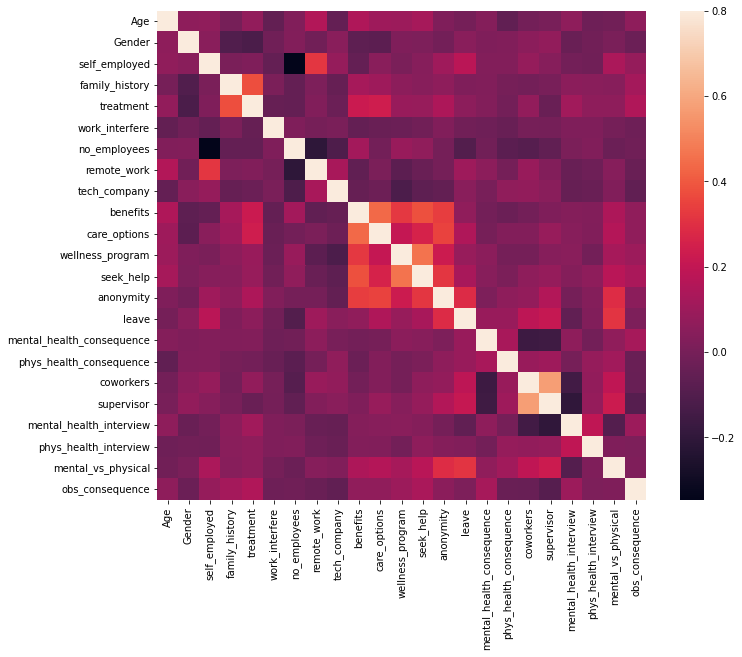

In [64]:
#correlation matrix
corrmat = newdf.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.8, square=True);
plt.show()


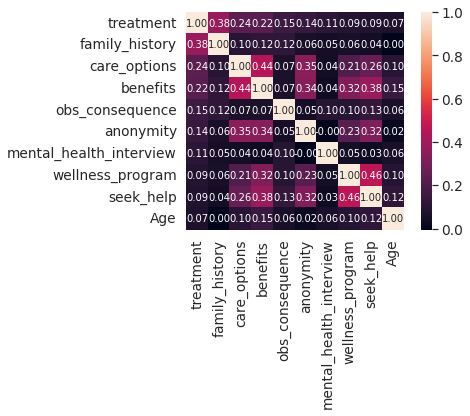

In [66]:
#treatment correlation matrix
k = 10 #number of variables for heatmap
cols = corrmat.nlargest(k, 'treatment')['treatment'].index
cm = np.corrcoef(newdf[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()